# Principal Component Analysis

### Import all the necessary libraries and cancer data.

### Import the data to a dataframe and view 10 rows

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv("breast-cancer-wisconsin-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [3]:
# Id columns is to identify rows hence can be skipped in analysis
# All columns have numerical values
# Class would be the target variable. Should be removed when PCA is done

In [4]:
df = df.drop(columns=['ID', 'Class'], axis=1)

In [5]:
df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [6]:
df.shape

(699, 9)

### Describe the dataset

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0


### Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary

In [8]:
# finding Duplicate records based on ID 
df.drop_duplicates(keep = 'first', inplace = True)

#### Hint: Look for "?" in the data and replace with mode

In [9]:
#replacing the ? in the data set  
df["Bare Nuclei"] = pd.to_numeric(df["Bare Nuclei"],errors= "coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 463 non-null int64
Cell Size                      463 non-null int64
Cell Shape                     463 non-null int64
Marginal Adhesion              463 non-null int64
Single Epithelial Cell Size    463 non-null int64
Bare Nuclei                    449 non-null float64
Normal Nucleoli                463 non-null int64
Bland Chromatin                463 non-null int64
Mitoses                        463 non-null int64
dtypes: float64(1), int64(8)
memory usage: 36.2 KB


In [10]:
#replacing the NaN values with mode values
df['Bare Nuclei'].fillna(df['Bare Nuclei'].mode()[0], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 463 non-null int64
Cell Size                      463 non-null int64
Cell Shape                     463 non-null int64
Marginal Adhesion              463 non-null int64
Single Epithelial Cell Size    463 non-null int64
Bare Nuclei                    463 non-null float64
Normal Nucleoli                463 non-null int64
Bland Chromatin                463 non-null int64
Mitoses                        463 non-null int64
dtypes: float64(1), int64(8)
memory usage: 36.2 KB


In [12]:
df.shape

(463, 9)

### Check for correlation and plot pairplots

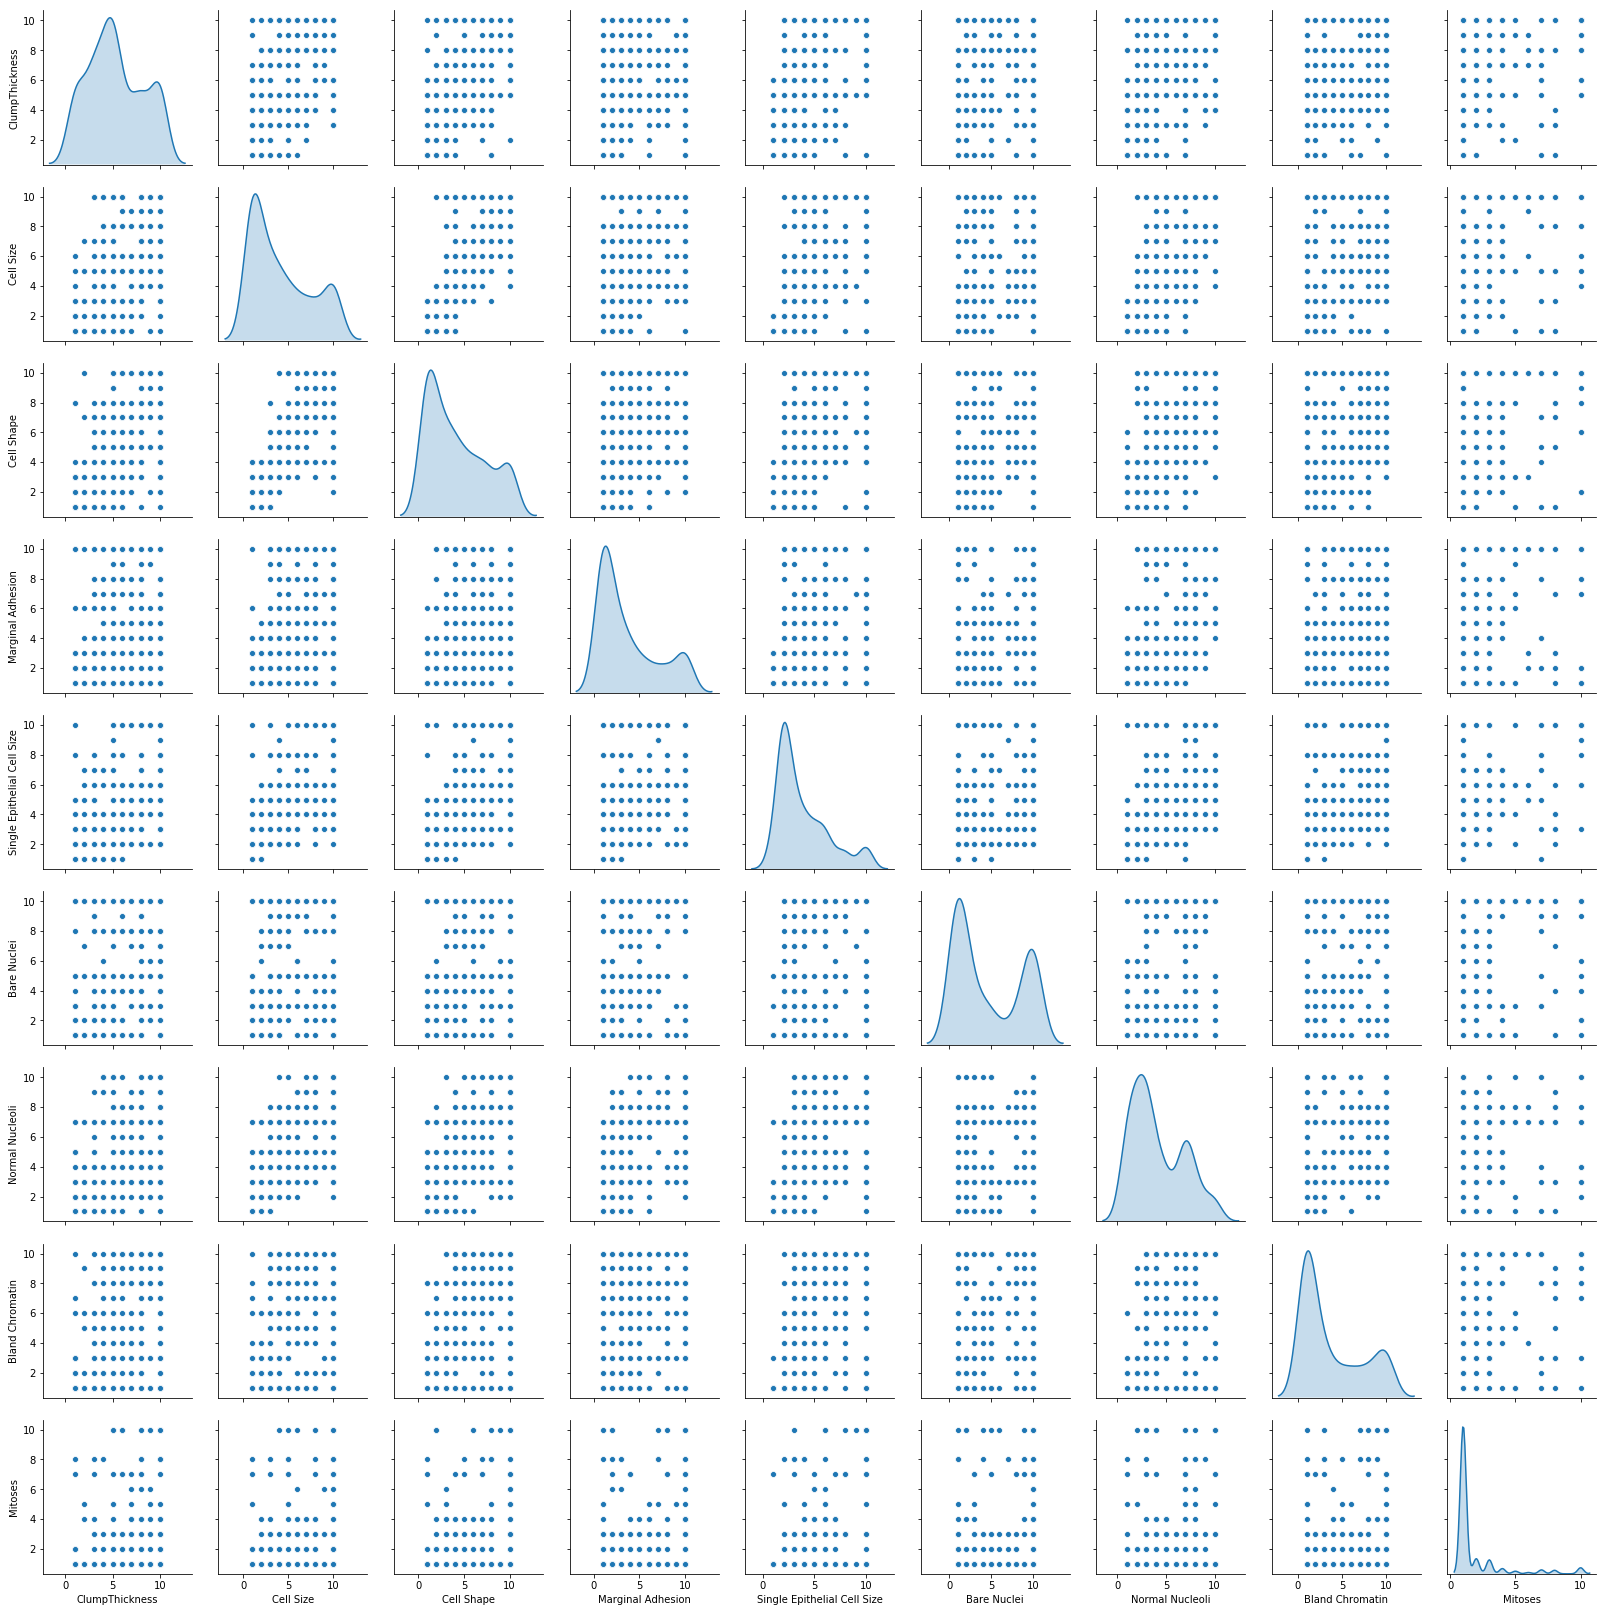

In [13]:
sns.pairplot(df, diag_kind = 'kde')

In [14]:
df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ClumpThickness,1.000000,0.578156,0.588956,0.383573,0.432165,0.511254,0.496158,0.450853,0.296797
Cell Size,0.578156,1.000000,0.877404,0.640096,0.689982,0.589270,0.712986,0.657170,0.403911
Cell Shape,0.588956,0.877404,1.000000,0.612415,0.649388,0.614430,0.687331,0.654724,0.381645
Marginal Adhesion,0.383573,0.640096,0.612415,1.000000,0.528163,0.591222,0.611294,0.514134,0.358434
Single Epithelial Cell Size,0.432165,0.689982,0.649388,0.528163,1.000000,0.483106,0.554625,0.558757,0.434875
Bare Nuclei,0.511254,0.589270,0.614430,0.591222,0.483106,1.000000,0.603506,0.471511,0.267145
Normal Nucleoli,0.496158,0.712986,0.687331,0.611294,0.554625,0.603506,1.000000,0.607259,0.279795
Bland Chromatin,0.450853,0.657170,0.654724,0.514134,0.558757,0.471511,0.607259,1.000000,0.369716
Mitoses,0.296797,0.403911,0.381645,0.358434,0.434875,0.267145,0.279795,0.369716,1.000000


### Pre-processing: Remove any unwanted columns or outliers, standardize variables
#### Use Z score from scipy.stats

In [15]:
from scipy.stats import zscore

In [16]:
df1 =df.apply(zscore)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 463 non-null float64
Cell Size                      463 non-null float64
Cell Shape                     463 non-null float64
Marginal Adhesion              463 non-null float64
Single Epithelial Cell Size    463 non-null float64
Bare Nuclei                    463 non-null float64
Normal Nucleoli                463 non-null float64
Bland Chromatin                463 non-null float64
Mitoses                        463 non-null float64
dtypes: float64(9)
memory usage: 56.2 KB


### Create a covariance matrix for identifying Principal components

In [18]:
# You can also use np.cov(cancerDF.T)
df1_cov=np.cov(df1.T)
df1.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,-0.112858,-0.981089,-1.038913,-0.854637,-0.752852,-0.953198,-0.444067,-0.828985,-0.433845
1,-0.112858,-0.054060,-0.076880,0.415658,1.292749,1.370954,-0.444067,-0.533284,-0.433845
2,-0.809565,-0.981089,-1.038913,-0.854637,-0.752852,-0.694959,-0.444067,-0.828985,-0.433845
3,0.235496,1.181979,1.205832,-0.854637,-0.343732,-0.178481,-0.444067,0.945221,-0.433845
4,-0.461211,-0.981089,-1.038913,-0.219489,-0.752852,-0.953198,-0.444067,-0.828985,-0.433845


### Identify eigen values and eigen vector and print them

In [19]:
from numpy.linalg import eig
EigenValue , EigenVector=eig(df1_cov)
EigenVector

array([[ 2.94678168e-01,  1.55203266e-01, -2.11933025e-03,
         8.40750860e-01,  9.15782864e-02, -2.64674187e-01,
         2.77698658e-01,  1.61712291e-01, -2.24456106e-02],
       [ 3.91432837e-01,  3.19012374e-02,  7.38800887e-01,
        -5.46225964e-03, -2.11968991e-01,  3.49511444e-01,
        -1.58339985e-01,  2.81585087e-01,  1.68686822e-01],
       [ 3.86411764e-01,  7.39117681e-02, -6.60062483e-01,
         5.13199581e-02, -1.88779631e-01,  5.28147195e-01,
        -1.66540775e-01,  2.23558141e-01,  1.20894573e-01],
       [ 3.29909342e-01,  5.36544974e-02, -4.70253861e-02,
        -4.69570221e-01,  4.20780766e-01, -1.23498783e-01,
         5.19902117e-01,  4.46760939e-01, -5.80645462e-02],
       [ 3.35034014e-01, -2.25646367e-01, -7.12985932e-02,
        -1.32358106e-01, -2.68084683e-01, -3.37268221e-01,
         1.92960795e-01, -3.42742665e-01,  6.88409846e-01],
       [ 3.23069423e-01,  3.03386242e-01,  7.51177690e-02,
         5.24705853e-04,  5.82025166e-01,  2.486050

In [20]:
EigenValue

array([5.3615167 , 0.84596315, 0.11714034, 0.64078509, 0.57596239,
       0.31931774, 0.3371869 , 0.37646738, 0.44514083])

### Find variance and cumulative variance by each eigen vector
#### Find total of eig_val
#### For each eig_val divide it by total and multiply by 100 the result. Save it in an array called explained variance. Use for loop to iterate through the eig_val array.
#### Do a cumulative sum of all the explained variance.
#### Plot the explained variance.

In [21]:
tot = sum(EigenValue)
tot

9.019480519480522

In [22]:
var_explained = [(i/tot)*100 for i in sorted(EigenValue, reverse = True)]

In [23]:
cum_var = np.cumsum(var_explained)

In [24]:
cum_var

array([ 59.44374165,  68.82303073,  75.92748741,  82.31324758,
        87.24857427,  91.42251069,  95.16093994,  98.70125177,
       100.        ])

In [25]:
# To find the total number of components, take value where the variance crosses 90%. Here, it can be either 5, 6 or 7.

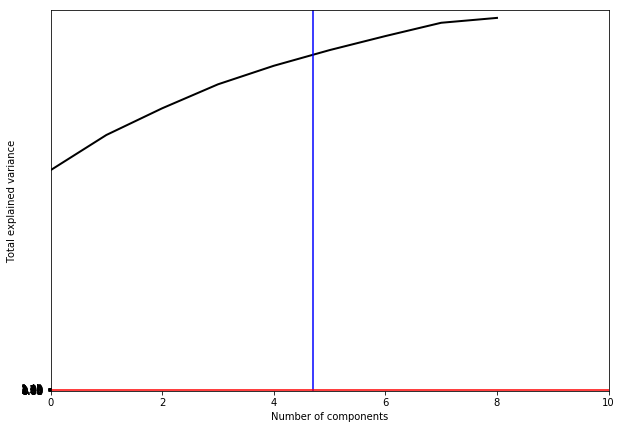

In [26]:
plt.figure(figsize=(10,7))

plt.plot(cum_var, color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 10)
plt.yticks(np.arange(0.7, 1.5, 0.05))

plt.axvline(4.7, c='b')
plt.axhline(0.9, c='r')

plt.show()

### Use PCA from sklearn and find the Principal Components. Transform data to components formed.
#### import PCA from sklearn.decomposition
#### use PCA.components_ to get the components

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=6)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
X_pca = pca.transform(df)

In [30]:
X_pca.shape

(463, 6)

#### Convert PCA components to a dataframe. Find out correlation between the components and the dataframe columns

In [31]:
PCA_Comp = pd.DataFrame(X_pca)

In [32]:
PCA_Comp

,0,1,2,3,4,5
0,-7.115386,0.246259,-1.257903,0.276200,0.379293,-1.044877
1,2.149008,-4.873391,0.892676,0.451317,0.405276,2.498971
2,-7.228974,-0.458117,0.241338,-0.323039,-0.258262,0.117906
3,2.495320,3.528598,-2.753046,-1.271185,-2.855243,1.223177
4,-6.708063,0.035570,0.740300,0.780820,0.554609,-1.644114
5,12.411031,-0.657957,0.248450,0.978782,-3.023078,-0.490551
6,-4.329095,-6.706882,1.603382,-3.112809,-0.741816,3.254451
7,-7.540830,0.541571,0.896704,0.065116,-0.941299,0.432810
8,-8.005598,0.987156,1.097618,0.528264,2.818280,2.190811
9,-7.278869,0.501440,-0.629705,0.465539,0.059938,-0.232588


In [33]:
pca.explained_variance_

array([51.0109909 ,  7.68470417,  5.60844707,  4.61735426,  3.69579044,
        3.51219975])

In [34]:
pca.explained_variance_ratio_

array([0.62169091, 0.0936565 , 0.06835234, 0.0562735 , 0.04504204,
       0.04280455])

In [35]:
PCA_Comp.corr()

,0,1,2,3,4,5
0,1.000000e+00,1.613963e-14,-3.341584e-17,-1.969166e-16,-4.228435e-16,4.423718e-16
1,1.613963e-14,1.000000e+00,-1.629628e-16,-4.316601e-17,1.010064e-16,8.471728e-17
2,-3.341584e-17,-1.629628e-16,1.000000e+00,-3.528854e-15,5.658327e-17,-1.987117e-17
3,-1.969166e-16,-4.316601e-17,-3.528854e-15,1.000000e+00,-1.303065e-17,-2.595800e-16
4,-4.228435e-16,1.010064e-16,5.658327e-17,-1.303065e-17,1.000000e+00,6.592615e-16
5,4.423718e-16,8.471728e-17,-1.987117e-17,-2.595800e-16,6.592615e-16,1.000000e+00


# Support Vector Machines

#### Read the input file 'diabetes.csv' using Pandas and check it's column names

In [36]:
svmdata = pd.read_csv('diabetes.csv')

In [37]:
svmdata.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [38]:
svmdata.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
27,1,97,66,15,140,23.2,0.487,22,0
747,1,81,74,41,57,46.3,1.096,32,0
263,3,142,80,15,0,32.4,0.200,63,0
517,7,125,86,0,0,37.6,0.304,51,0
446,1,100,72,12,70,25.3,0.658,28,0
667,10,111,70,27,0,27.5,0.141,40,1
373,2,105,58,40,94,34.9,0.225,25,0
672,10,68,106,23,49,35.5,0.285,47,0
290,0,78,88,29,40,36.9,0.434,21,0
317,3,182,74,0,0,30.5,0.345,29,1


In [39]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    svmdata[column] = svmdata[column].replace(0, np.NaN)
    mean = int(svmdata[column].mean(skipna=True))
    svmdata[column] = svmdata[column].replace(np.NaN, mean)

In [40]:
svmdata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [41]:
svmdata.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Do correlation analysis using heatmap 

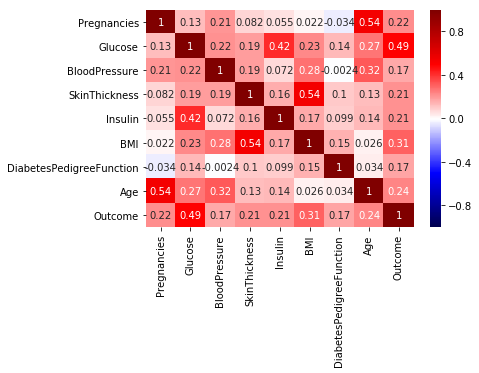

In [42]:
sns.heatmap(svmdata.corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

#### Split the dataset and Scale the data points using MinMaxScaler

In [43]:
y = svmdata['Outcome']
x = svmdata.drop('Outcome', axis = 1)

In [44]:
x.shape

(768, 8)

In [45]:
y.shape

(768,)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.20)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


#### Train Support Vector Machine Model

In [49]:
classifier = SVC(random_state=0, kernel='rbf')
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [50]:
y_pred = classifier.predict(X_test)

In [51]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

## Popularity based Recommendation systems

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

### Read the dataset(jokes.csv).
Check whether you file has header or not in it. If there is no header, then use header=none while reading the dataset

In [52]:
# header is available in the data hence reading the file directly 
prdata = pd.read_csv('jokes.csv')

In [53]:
prdata.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [54]:
prdata.shape

(24983, 101)

In [55]:
prdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, NumJokes to Joke100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


### Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [56]:
ratings = prdata.iloc[0:200,1:101]

### Change the column indices from 0 to 99

In [57]:
ratings.rename(inplace = True, columns={x:y for x,y in zip(ratings.columns,range(0,len(ratings.columns)))})

In [58]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### In the dataset, the null ratings are given as 99, so replace all 99s with 0

In [59]:
ratings.replace(99,0, inplace = True)

In [60]:
ratings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [61]:
sc_X = StandardScaler()
ratings_diff = pd.DataFrame(sc_X.fit_transform(ratings))

In [62]:
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133


### Find the mean for each column  in `ratings_diff` i.e, for each joke

In [63]:
mean = pd.DataFrame(ratings_diff.mean(axis = 0))
mean.head()

,0
0,-1.110223e-17
1,-9.658940e-17
2,-4.107825e-17
3,3.719247e-17
4,-8.881784e-18


### Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [64]:
print("Top 10 Movies based on mean Rating : " , (mean.nlargest(10, 0).index))

Top 10 Movies based on mean Rating :  Int64Index([98, 81, 97, 20, 94, 92, 47, 73, 99, 49], dtype='int64')


## Recommendation Systems - Content based modeling - OPTIONAL

#### Import movies_metadata.csv

#### Check whether tagline has NA values. If so do a fillna with '' (two single quotes with no spaces)
#### Create a new column Description by appending tagline and overview column
#### Drop rows from the dataframe where the newly created Description column is NA.
#### Drop duplicates from the Title column
#### Check the count of records before and after dropping the Description column
#### Do a reset of the index


In [ ]:
movie.dropna(inplace=True, subset=['Description'])
#movie['title'].drop_duplicates(inplace=True)
movie.drop_duplicates(subset=['title'], inplace=True)

#### Use TFIDF vectorizer and create tfidf matrix only for Description column
#### use ngram (1,3), analyzer as word, stop words as english and min_df = 0

#### from sklearn.metrics.pairwise import linear_kernel
#### Pass on the tfidf_matrix created
##### This is used to find the similarities in the data

In [ ]:
#The below two codes help create a series where index would be the title of the movie and column will be the index
titles = movie['title']
indices = pd.Series(movie.index, index=movie['title'])

In [ ]:
def recommend(title):
    idx = indices[title]
    print('idx value is ', idx)
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    print(sim_scores)
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [ ]:
recommend('Jumanji').head(10)